In [29]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
import seaborn as sns
import spacy
import string

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /Users/monish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df = pd.read_csv("/Users/monish/Downloads/RateMyProfessor_Sample data.csv")
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# Tokenize and preprocess the comments
import numpy as np  # Import the numpy library for handling NaN values

def preprocess_text(text):
    # Check if the text is NaN
    if isinstance(text, float) and np.isnan(text):
        return []  # Return an empty list for NaN values
    else:
        # Tokenize words
        tokens = word_tokenize(str(text).lower())  # Convert to string before lowercasing
        # Remove stopwords and punctuation
        stop_words = set(stopwords.words("english") + list(string.punctuation))
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return filtered_tokens

    return filtered_tokens

# Apply text preprocessing to comments
df['preprocessed_comments'] = df['comments'].apply(preprocess_text)
df['preprocessed_comments']

0        [class, hard, knockout, content, stimulating, ...
1        [definitely, going, choose, class, interesting...
2        [overall, enjoyed, class, assignments, straigh...
3        [yes, possible, get, definitely, work, content...
4        [professor, looney, great, knowledge, astronom...
                               ...                        
19995               [great, sense, humor, love, parasites]
19996    [really, nice, guy, really, funny, however, bi...
19997    [parasitology, class, lot, work, makes, extrem...
19998    [way, much, work, 1, credit, class, shegnoski,...
19999    [extremely, easy, lab, teacher, quizzes, littl...
Name: preprocessed_comments, Length: 20000, dtype: object

In [36]:
def extract_unique_phrases(text, excluded_words, stop_words):
    # Check if the text is a string
    if isinstance(text, str):
        # Tokenize, remove stop words, and extract phrases
        tokens = [token for token in text.split() if token.lower() not in stop_words]
        phrases = [" ".join(tokens[i:i+2]) for i in range(len(tokens)-1)]
        
        # Filter out excluded words and normalize phrases
        filtered_phrases = set([phrase.lower().strip(".,") for phrase in phrases if all(word not in phrase for word in excluded_words)])
        
        return filtered_phrases
    else:
        return set()



# Define a list of words to exclude from sentiment analysis
excluded_words = ["never", "always"]

# Get NLTK stop words
stop_words = set(stopwords.words("english"))

# Extract positive phrases
positive_phrases = [phrase for text in df['comments'] for phrase in extract_unique_phrases(text, excluded_words, stop_words) if any(word in phrase for word in ['great', 'good', 'helpful', 'interesting', 'nice', 'awesome', 'amazing', 'funny', 'clear', 'highly', 'extra'])]

# Extract negative phrases
negative_phrases = [phrase for text in df['comments'] for phrase in extract_unique_phrases(text, excluded_words, stop_words) if any(word in phrase for word in ['hard', 'worst', 'never', 'difficult', 'bad', 'horrible', 'tough'])]

# Count occurrences of unique positive and negative phrases
positive_phrases_counter = Counter(positive_phrases)
negative_phrases_counter = Counter(negative_phrases)



# Print the top positive phrases
print("\nTop 20 Positive Phrases:")
print(positive_phrases_counter.most_common(20))

# Print the top negative phrases
print("\nTop 20 Negative Phrases:")
print(negative_phrases_counter.most_common(20))




Top 20 Positive Phrases:
[('great teacher', 616), ('good teacher', 451), ('extra credit', 404), ('nice guy', 375), ('great professor', 372), ('highly recommend', 251), ('class interesting', 210), ('really nice', 198), ('good grade', 190), ('good professor', 188), ('great guy', 179), ('get good', 175), ('great class', 137), ('really good', 135), ('awesome teacher', 123), ('great teacher!', 116), ('great prof', 115), ('nice lady', 108), ('extremely helpful', 107), ('good class', 103)]

Top 20 Negative Phrases:
[('hard understand', 166), ('work hard', 164), ('worst teacher', 153), ('tough grader', 146), ('class hard', 127), ('tests hard', 124), ('hard class', 116), ('really hard', 107), ('worst professor', 107), ('hard grader', 91), ("it\\'s hard", 71), ('one worst', 67), ('extremely hard', 65), ('tests difficult', 62), ('hard get', 59), ('horrible teacher', 59), ('bad teacher', 58), ('hard time', 55), ('hard follow', 51), ('worst class', 45)]


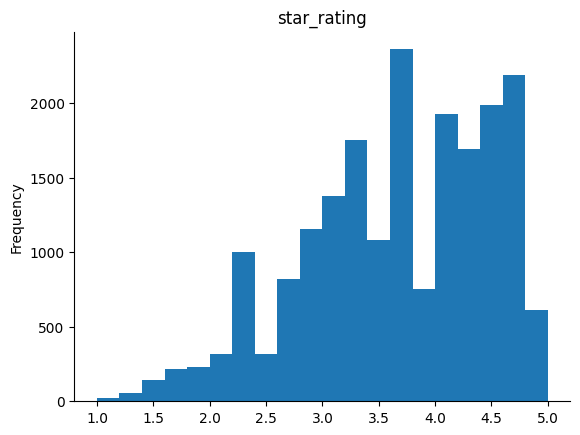

In [40]:

# Plot the histogram of 'star_rating' column in the DataFrame
df['star_rating'].plot(kind='hist', bins=20, title='star_rating')

# Remove the top and right spines of the plot for a cleaner appearance
# 'spines' refer to the borders of the plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


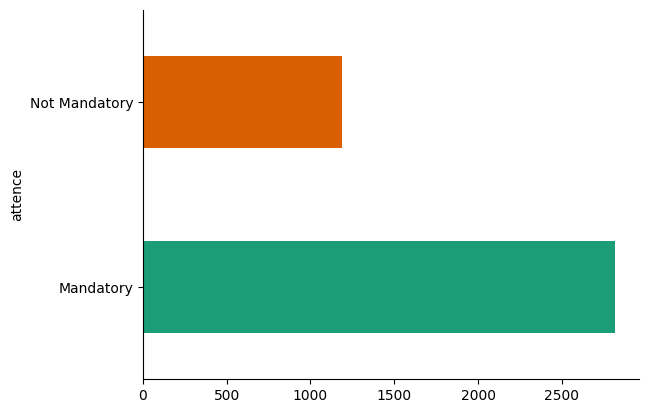

In [39]:


# Group the DataFrame ('df') by the 'attence' column and calculate the size of each group
grouped_data = df.groupby('attence').size()

# Plot a horizontal bar chart of the attendance counts using seaborn color palette 'Dark2'
# 'barh' specifies a horizontal bar chart
# 'color=sns.palettes.mpl_palette('Dark2')' sets the color of bars using the Dark2 palette from seaborn
grouped_data.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remove the top and right spines of the plot for a cleaner appearance
# 'spines' refer to the borders of the plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


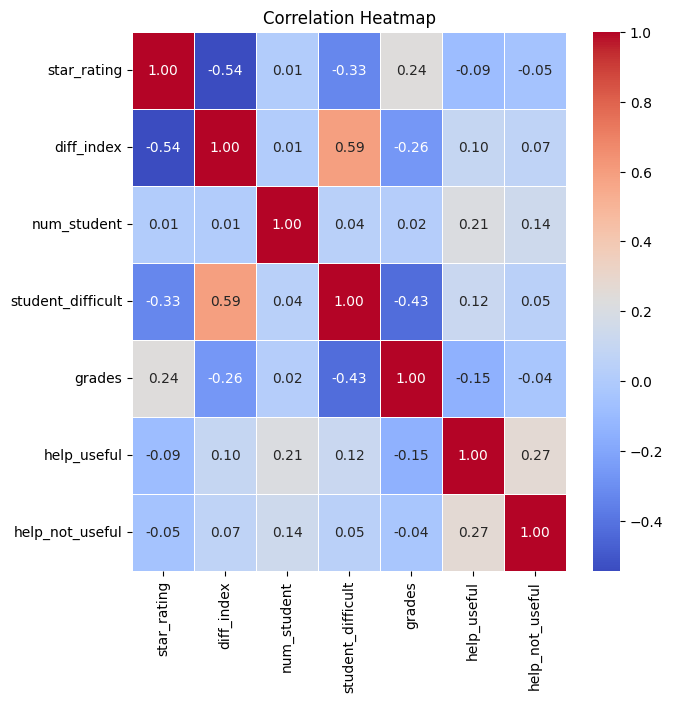

In [24]:
# Assuming your CSV file is in the root of your Google Drive
file_path = '/Users/monish/Downloads/RateMyProfessor_Sample data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert 'grades' to a numerical scale (you might need to customize this based on your grading system)
grade_mapping = {'A+': 4.3, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7, 'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'D-': 0.7, 'F': 0.0}
df['grades'] = df['grades'].map(grade_mapping)

# Select the columns for correlation analysis
selected_columns = ['star_rating', 'take_again', 'diff_index', 'num_student',
                    'student_difficult', 'attence', 'for_credits', 'would_take_agains',
                    'grades', 'help_useful', 'help_not_useful']

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 7))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


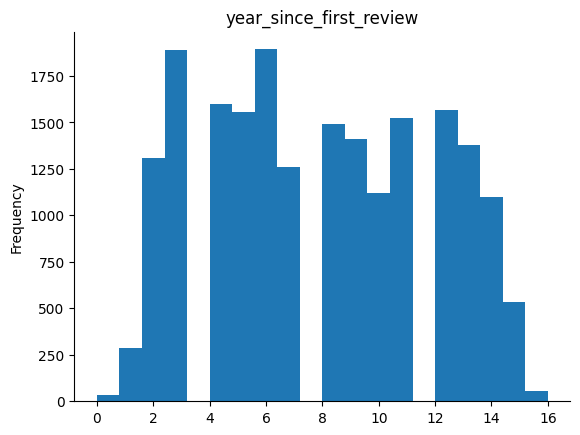

In [41]:
from matplotlib import pyplot as plt

# Plot a histogram of the 'year_since_first_review' column in the DataFrame ('df')
# 'kind='hist'' specifies the type of plot as a histogram
# 'bins=20' sets the number of bins for the histogram
# 'title='year_since_first_review'' sets the title of the plot
df['year_since_first_review'].plot(kind='hist', bins=20, title='year_since_first_review')

# Remove the top and right spines of the plot for a cleaner appearance
# 'spines' refer to the borders of the plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()
